In [3]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


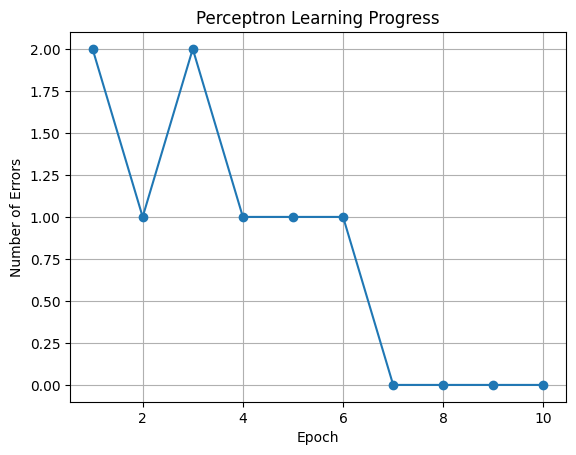

In [15]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5], [3, 4]])  # Features: size, color
y = np.array([1, -1, 1, 1]) # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

Exercise 1
1. The -1 meansthat the book is a non-fiction book
2. Total errors across 10 epochs is 8
3. Perceptron convergence theorem staets that if the dataset is linearly separable, the Perceptron will evetually find the correct weihts that separate the classes. Once it finds the line(decision boundary), it classifies all the samples correctly. The classes we used to train on are linearly separable. Which means we can draw a straight line that perfectly divides two classses.

Exercise 2
1. It goes back and forth and continous to do the same thing until the the algorith finds a set of weights that correctly classifies everything. The errors go up and down beacuse each weight update fixes some misclassifications but it may create new ones 
2. It means the perceptron has learned the correct sorting rule that classifies all the training samples perfectly.


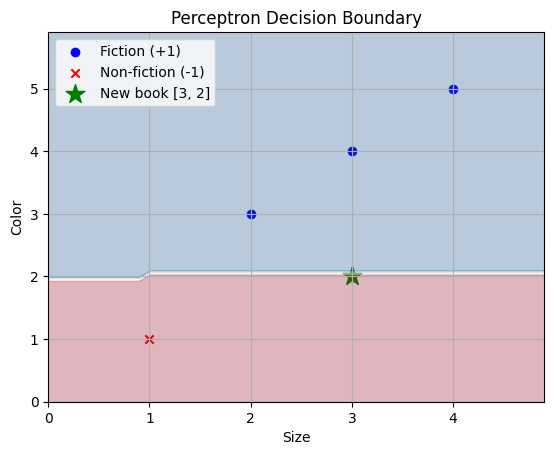

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Exercise 3: Visualizing the decision boundary

1. The new book got the prediction of -1 because it is on the boundary line and it is still part of the red shaded part

2. The decision boundary is the line that separates the feature space into two regions: books above the line are classified as Fiction, and books below the line are classified as Non-fiction.

3. The predition would be 1, it falls on the blue shaded part, which is fiction.

Exercise 4 Expermention with Learning Parameters

[3,2]= still -1 with Setting 1: eta=0.01 (slower learning), n_iter=20. 
There 8 errors

[3,2]= 1 with Setting 2: eta=0.5 (faster learning), n_iter=5.
there are 7 model errors, there is no decision line/ separation line 

1. It stays the same the errors stop on 7. 
2. the fewer epochs did not reach 0 errors. The one that more epochs shows where the errors end and where the 0 errors start.  It did not change much 

3. with the faster it changed to 1(fiction) because there was no boundary line dividing the 2 classes. The slower stayed the same, it was -1 




In [8]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 (Setosa) and 1 (Versicolor)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


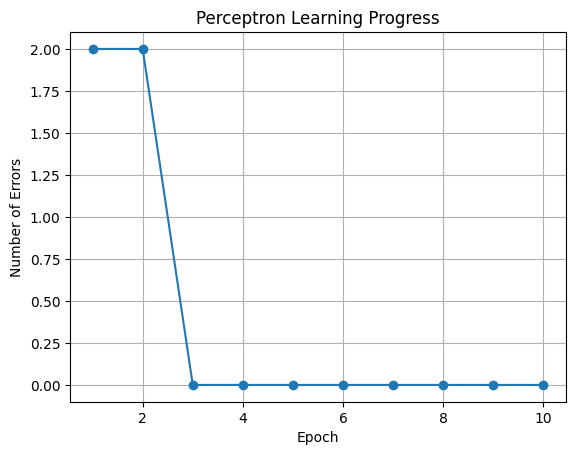

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

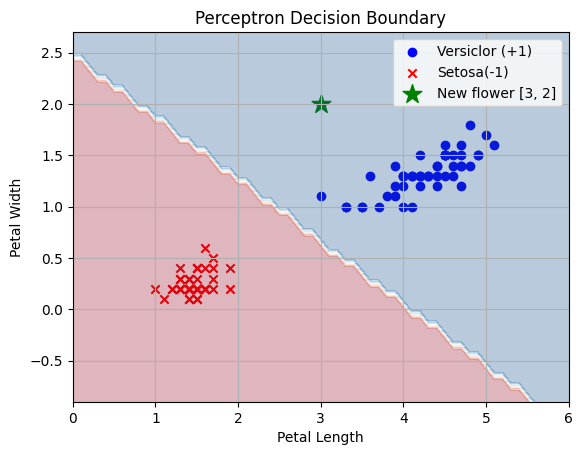

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Versiclor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Setosa(-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New flower [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Excercise 5
1. Versicolor 
2. Versicolor and Setosa are linearly separable in the iris dataset. meaning that the errors reach 0.
3. Easier to read, the classes are separated clearer than the book dataset

Bonus Challenge 
1. Nothing changes, the errors stop at the same point as they did before. We just added a new point and two other labels

2. The errors do reach 0. It is stll linearly separable



Using the robot librarian analogy, I learned that the Perceptron works by creating a simple sorting rule to separate different categories, just like a librarian sorting books into Fiction and Non-fiction. At first, the librarian makes mistakes and adjusts the rule whenever a book is misclassified. Over time, these adjustments improve the rule until all the books are correctly sorted, which corresponds to the Perceptron reaching zero errors. This showed me that the Perceptron can only succeed when the books (or data) can be separated by a straight line, meaning the dataset must be linearly separable.
